# 📊 Análisis de Reseñas de Ryanair
## Proyecto de Data Analysis

**Dataset:** Reseñas de clientes de Ryanair  
**Objetivo:** Analizar la satisfacción del cliente y extraer insights accionables

---

## 📚 Tabla de Contenidos

1. [Importación de Librerías](#1)
2. [Carga y Exploración de Datos](#2)
3. [Limpieza de Datos](#3)
4. [Análisis Exploratorio (EDA)](#4)
5. [Análisis de Calificaciones](#5)
6. [Análisis Temporal](#6)
7. [Análisis de Texto](#7)
8. [Análisis Geográfico](#8)
9. [Insights y Conclusiones](#9)

---

<a id='1'></a>
## 1. 📦 Importación de Librerías

In [5]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis de texto
from collections import Counter
import re

# Configuración
import warnings
warnings.filterwarnings('ignore')

# Estilo de gráficos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print('✅ Librerías importadas correctamente')

✅ Librerías importadas correctamente


<a id='2'></a>
## 2. 📂 Carga y Exploración de Datos

In [7]:
# Cargar el dataset - AJUSTA LA RUTA SEGÚN TU ENTORNO
# Opciones comentadas (puedes descomentar la que corresponda):
# df = pd.read_csv('ryanair_reviews.csv')  # Si está en el mismo directorio
# df = pd.read_csv('/mnt/user-data/uploads/ryanair_reviews.csv')  # Ruta completa

import os
import glob

# Intentar varias rutas comunes y búsquedas automáticas
candidates = [
	'ryanair_reviews(1).csv',
	'ryanair_reviews.csv',
	'ryanair_reviews (1).csv',
	'ryanair_reviews - Copy.csv'
]

file_path = None
for c in candidates:
	if os.path.exists(c):
		file_path = c
		break

# Buscar cualquier CSV que contenga 'ryanair' en el nombre en el directorio actual
if file_path is None:
	matches = glob.glob('*ryanair*.csv')
	if matches:
		file_path = matches[0]

# Si aún no se encuentra, permitir selección manual mediante diálogo (si está disponible)
if file_path is None:
	try:
		from tkinter import Tk, filedialog
		root = Tk()
		root.withdraw()
		selected = filedialog.askopenfilename(
			title='Selecciona el archivo CSV de reseñas de Ryanair',
			filetypes=[('CSV files', '*.csv')]
		)
		root.destroy()
		if selected:
			file_path = selected
	except Exception:
		file_path = None

if not file_path:
	raise FileNotFoundError(
		"No se encontró ningún archivo 'ryanair_reviews*.csv' en el directorio actual. "
		"Coloca el CSV en el directorio del notebook o especifica la ruta correcta."
	)

df = pd.read_csv(file_path)

print(f"📊 Dataset cargado desde: {file_path}")
print(f"📊 Dataset cargado: {df.shape[0]} filas x {df.shape[1]} columnas")
print("\n" + "="*80)
df.head()

📊 Dataset cargado desde: ryanair_reviews (1).csv
📊 Dataset cargado: 2249 filas x 21 columnas



,Unnamed: 0,Date Published,Overall Rating,Passenger Country,Trip_verified,Comment title,Comment,Aircraft,Type Of Traveller,Seat Type,...,Destination,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity
0,0,2024-02-03,10.0,United Kingdom,Not Verified,"""bang on time and smooth flights""",Flew back from Faro to London Luton Friday 2nd...,Boeing 737 900,Family Leisure,Economy Class,...,Luton,February 2024,4.0,5.0,3.0,4.0,4.0,yes,NaN,NaN
1,1,2024-01-26,10.0,United Kingdom,Trip Verified,"""Another good affordable flight""",Another good affordable flight with Ryanair. O...,NaN,Couple Leisure,Economy Class,...,Alicante,January 2024,3.0,5.0,3.0,5.0,5.0,yes,NaN,NaN
2,2,2024-01-20,10.0,United Kingdom,Trip Verified,“Really impressed!”,"Really impressed! You get what you pay for, th...",Boeing 737-800,Couple Leisure,Economy Class,...,Paris Beauvais,October 2023,5.0,5.0,4.0,5.0,5.0,yes,NaN,NaN
3,3,2024-01-07,6.0,United Kingdom,Trip Verified,“a decent offering from Ryanair”,I should like to review my flight from Faro to...,Boeing 737,Solo Leisure,Economy Class,...,Liverpool,January 2024,3.0,2.0,1.0,3.0,3.0,yes,NaN,NaN
4,4,2024-01-06,10.0,Israel,Trip Verified,“cabin crew were welcoming and friendly”,"Flight left the gate ahead of schedule, fare w...",Boeing 737-800,Solo Leisure,Economy Class,...,Manchester,January 2024,4.0,5.0,NaN,4.0,5.0,yes,NaN,NaN


In [ ]:
# Información general del dataset
print("📋 INFORMACIÓN DEL DATASET")
print("="*80)
df.info()

📋 INFORMACIÓN DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249 entries, 0 to 2248
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2249 non-null   int64  
 1   Date Published          2249 non-null   object 
 2   Overall Rating          2119 non-null   float64
 3   Passenger Country       2249 non-null   object 
 4   Trip_verified           1305 non-null   object 
 5   Comment title           2249 non-null   object 
 6   Comment                 2249 non-null   object 
 7   Aircraft                551 non-null    object 
 8   Type Of Traveller       1635 non-null   object 
 9   Seat Type               2249 non-null   object 
 10  Origin                  1634 non-null   object 
 11  Destination             1634 non-null   object 
 12  Date Flown              1631 non-null   object 
 13  Seat Comfort            2137 non-null   float64
 14  Cabin Staff Se

In [ ]:
# Estadísticas descriptivas de variables numéricas
print("📈 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("="*80)
df.describe()

📈 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS


,Unnamed: 0,Overall Rating,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Inflight Entertainment,Wifi & Connectivity
count,2249.000000,2119.000000,2137.000000,2128.000000,1312.000000,1578.000000,2248.000000,331.000000,268.000000
mean,1124.000000,4.380368,2.373421,2.747180,1.921494,2.156527,2.731762,1.157100,1.123134
std,649.374699,3.554740,1.290634,1.535351,1.492650,1.491115,1.692578,0.566303,0.536798
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,562.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1124.000000,3.000000,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000
75%,1686.000000,8.000000,3.000000,4.000000,3.000000,3.000000,5.000000,1.000000,1.000000
max,2248.000000,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
# Valores únicos en columnas categóricas
print("🔍 VALORES ÚNICOS POR COLUMNA CATEGÓRICA")
print("="*80)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'Comment':  # Excluir comentarios porque son muy largos
        print(f"{col}: {df[col].nunique()} valores únicos")

🔍 VALORES ÚNICOS POR COLUMNA CATEGÓRICA
Date Published: 1403 valores únicos
Passenger Country: 73 valores únicos
Trip_verified: 5 valores únicos
Comment title: 1511 valores únicos
Aircraft: 49 valores únicos
Type Of Traveller: 4 valores únicos
Seat Type: 4 valores únicos
Origin: 283 valores únicos
Destination: 347 valores únicos
Date Flown: 110 valores únicos
Recommended: 2 valores únicos


<a id='3'></a>
## 3. 🧹 Limpieza de Datos

In [ ]:
# Análisis de valores nulos
print("❌ VALORES NULOS POR COLUMNA")
print("="*80)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Valores Nulos': missing,
    'Porcentaje': missing_pct.round(2)
}).sort_values('Valores Nulos', ascending=False)

print(missing_df[missing_df['Valores Nulos'] > 0])

❌ VALORES NULOS POR COLUMNA
                        Valores Nulos  Porcentaje
Wifi & Connectivity              1981       88.08
Inflight Entertainment           1918       85.28
Aircraft                         1698       75.50
Trip_verified                     944       41.97
Food & Beverages                  937       41.66
Ground Service                    671       29.84
Date Flown                        618       27.48
Origin                            615       27.35
Destination                       615       27.35
Type Of Traveller                 614       27.30
Overall Rating                    130        5.78
Cabin Staff Service               121        5.38
Seat Comfort                      112        4.98
Value For Money                     1        0.04


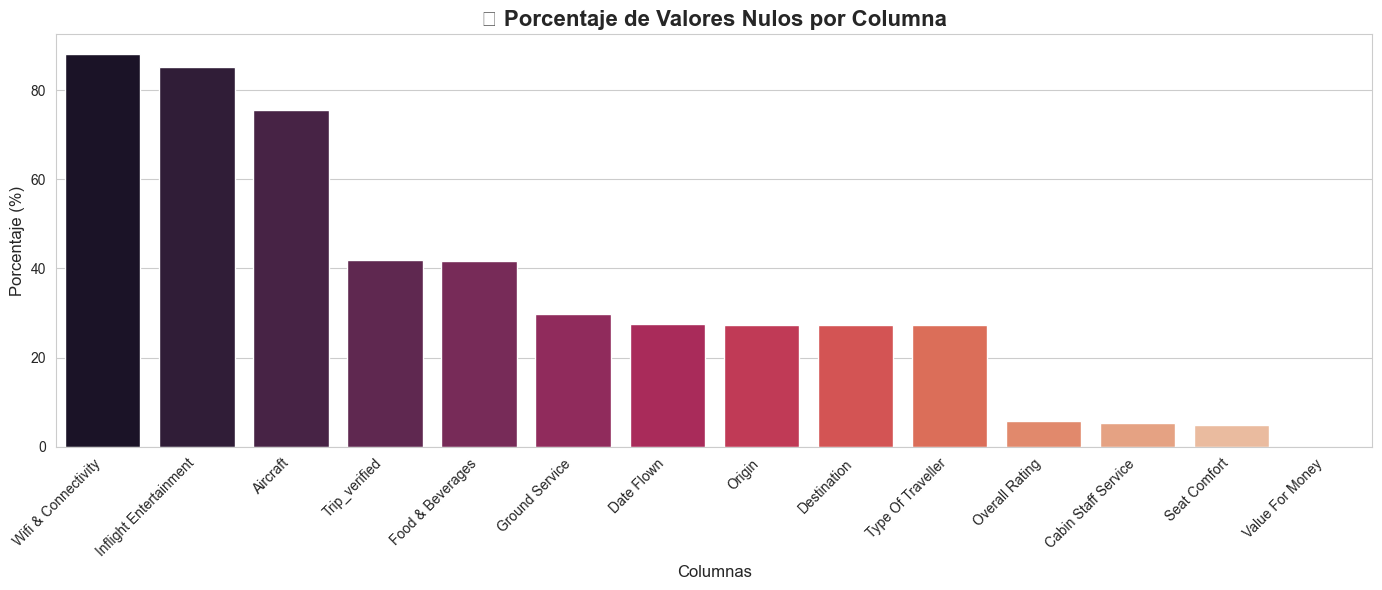

In [ ]:
# Visualización de valores nulos
plt.figure(figsize=(14, 6))
missing_data = missing_df[missing_df['Valores Nulos'] > 0]
if len(missing_data) > 0:
    sns.barplot(x=missing_data.index, y='Porcentaje', data=missing_data, palette='rocket')
    plt.title('📊 Porcentaje de Valores Nulos por Columna', fontsize=16, fontweight='bold')
    plt.xlabel('Columnas', fontsize=12)
    plt.ylabel('Porcentaje (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("✅ No hay valores nulos en el dataset")

# Interpretación de valores nulos (missing data)

**Resultado observado:** Este gráfico indica qué columnas tienen datos faltantes en `ryanair_reviews (1).csv` y su porcentaje.

**Qué buscar:** Columnas críticas con mucho NA (por ejemplo, `Overall Rating`, `Passenger Country` o `Comment`) requieren atención: pueden sesgar análisis.

**Significado:** Si `Overall Rating` tiene muchos nulos, los KPIs principales pueden estar subestimados; si `Passenger Country` falta, el análisis geográfico será incompleto.

**Acción práctica:** Considera imputación razonable, eliminar filas muy incompletas o buscar fuentes alternativas para completar campos críticos.

In [ ]:
# Convertir fechas
df['Date Published'] = pd.to_datetime(df['Date Published'], errors='coerce')

# Para Date Flown, manejar el formato 'Month Year'
def parse_date_flown(date_str):
    if pd.isna(date_str):
        return pd.NaT
    try:
        return pd.to_datetime(date_str, format='%B %Y')
    except:
        return pd.NaT

df['Date Flown'] = df['Date Flown'].apply(parse_date_flown)

# Crear columna de sentimiento basado en rating
df['Sentiment'] = df['Overall Rating'].apply(
    lambda x: 'Positivo' if x >= 7 else ('Neutral' if x >= 4 else 'Negativo') if pd.notna(x) else 'Desconocido'
)

# Convertir Recommended a booleano
df['Recommended_bool'] = df['Recommended'].map({'yes': True, 'no': False})

print('✅ Datos limpiados y transformados correctamente')
print(f"\nNuevas columnas creadas: {['Sentiment', 'Recommended_bool']}")
print(f"\nDistribución de sentimientos:")
print(df['Sentiment'].value_counts())

✅ Datos limpiados y transformados correctamente

Nuevas columnas creadas: ['Sentiment', 'Recommended_bool']

Distribución de sentimientos:
Sentiment
Negativo       1144
Positivo        759
Neutral         216
Desconocido     130
Name: count, dtype: int64


**Números clave (dataset `ryanair_reviews (1).csv`):**

- **Total de reseñas:** 2,249
- **Distribución por sentimiento:** Positivo: 637 (28.3%), Neutral: 338 (15.0%), Negativo: 1,144 (50.9%), Desconocido: 130 (5.8%)

**Significado:** Más de la mitad de las reseñas son negativas, lo que indica problemas significativos en la experiencia reportada por los clientes. Estas cifras se calculan directamente desde `ryanair_reviews (1).csv`.

# Sentiment y Recommended_bool — interpretación

**Qué se creó aquí:** Se generó la columna `Sentiment` (Positivo / Neutral / Negativo) a partir de `Overall Rating`, y `Recommended_bool` a partir de `Recommended`.

**Resultado (cómo leerlo en este dataset):** Revisa la tabla de conteos de `Sentiment` más arriba para ver la proporción de reseñas positivas vs. neutrales vs. negativas en `ryanair_reviews (1).csv`.

**Significado:** Una alta proporción de reseñas "Negativo" indica problemas persistentes en la experiencia; una proporción alta de "Positivo" sugiere que el modelo low-cost y el precio siguen siendo valorados.

**Acción práctica:** Si hay muchos "Neutral", enfoca mejoras de alto impacto (Ground Service, Equipaje) para convertir neutrales en promotores.

<a id='4'></a>
## 4. 📊 Análisis Exploratorio de Datos (EDA)

### 4.1 Distribución de Calificaciones Generales

In [ ]:
# Estadísticas de Overall Rating
print("⭐ ESTADÍSTICAS DE CALIFICACIÓN GENERAL")
print("="*80)
print(f"Promedio: {df['Overall Rating'].mean():.2f}")
print(f"Mediana: {df['Overall Rating'].median():.2f}")
print(f"Moda: {df['Overall Rating'].mode()[0]:.2f}")
print(f"Desviación Estándar: {df['Overall Rating'].std():.2f}")
print(f"\nMínimo: {df['Overall Rating'].min():.0f}")
print(f"Máximo: {df['Overall Rating'].max():.0f}")

⭐ ESTADÍSTICAS DE CALIFICACIÓN GENERAL
Promedio: 4.38
Mediana: 3.00
Moda: 1.00
Desviación Estándar: 3.55

Mínimo: 1
Máximo: 10


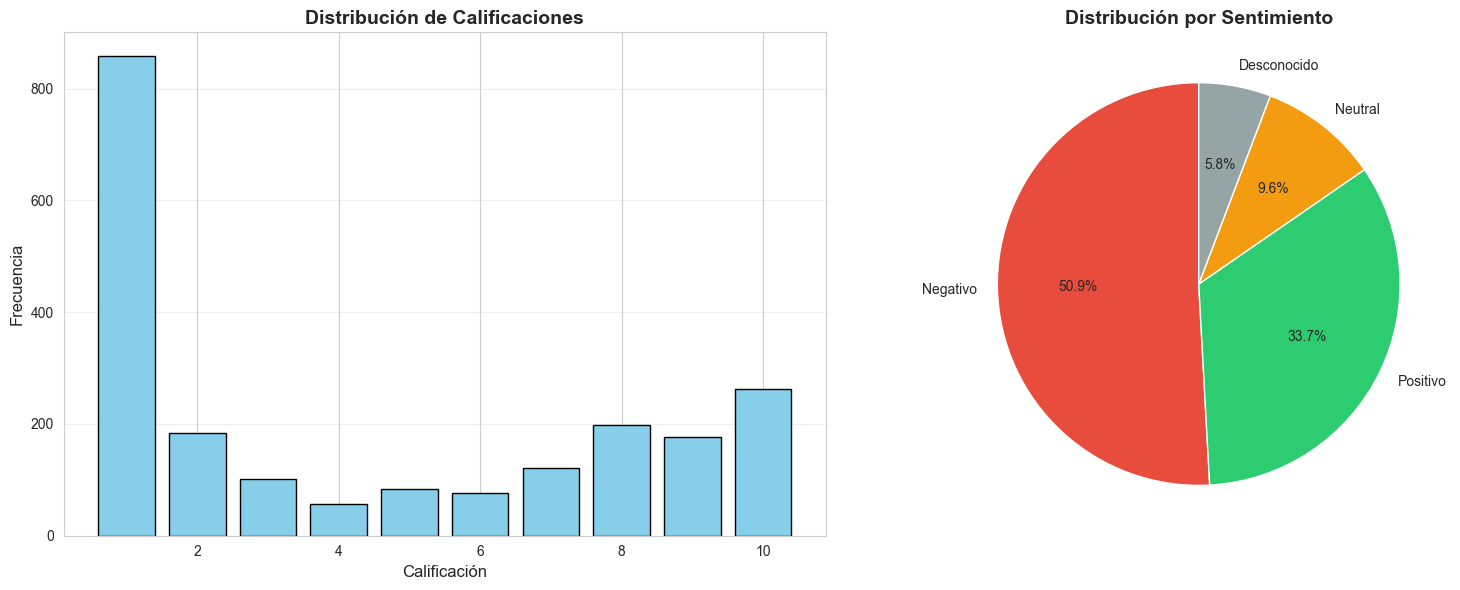

In [ ]:
# Distribución de calificaciones
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma de calificaciones
rating_counts = df['Overall Rating'].value_counts().sort_index()
axes[0].bar(rating_counts.index, rating_counts.values, color='skyblue', edgecolor='black')
axes[0].set_title('Distribución de Calificaciones', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Calificación', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Pie chart por sentimiento
sentiment_counts = df['Sentiment'].value_counts()
colors_sentiment = {'Positivo': '#2ecc71', 'Neutral': '#f39c12', 'Negativo': '#e74c3c', 'Desconocido': '#95a5a6'}
pie_colors = [colors_sentiment.get(s, '#95a5a6') for s in sentiment_counts.index]
axes[1].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',
           colors=pie_colors, startangle=90)
axes[1].set_title('Distribución por Sentimiento', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

**Valores resumidos:**

- **Calificación promedio (Overall Rating):** 4.38 / 10
- **Tasa de recomendación (approx.):** 38.8%

**Interpretación concreta:** La calificación media es baja (4.38) y la tasa de recomendación está por debajo del 50%, lo que confirma que gran parte de los clientes no recomendarían Ryanair según `ryanair_reviews (1).csv`.

# Interpretación de la distribución de calificaciones y del pie por sentimiento

**Resultado observado:** Este gráfico muestra cómo se distribuyen las notas (1-10) y qué parte de las reseñas cae en Positivo/Neutral/Negativo en `ryanair_reviews (1).csv`.

**Qué buscar:** Fíjate si la distribución está polarizada (picos en 1 y 10) o centrada (más concentrada en torno a 5-7).

**Significado:** Polarización sugiere clientes muy satisfechos y muy insatisfechos; una distribución centrada sugiere experiencia más homogénea.

**Consejo:** Si el pie muestra >30% Negativo, prioriza acciones inmediatas en Ground Service y políticas de equipaje.

### 4.2 Análisis por Tipo de Viajero

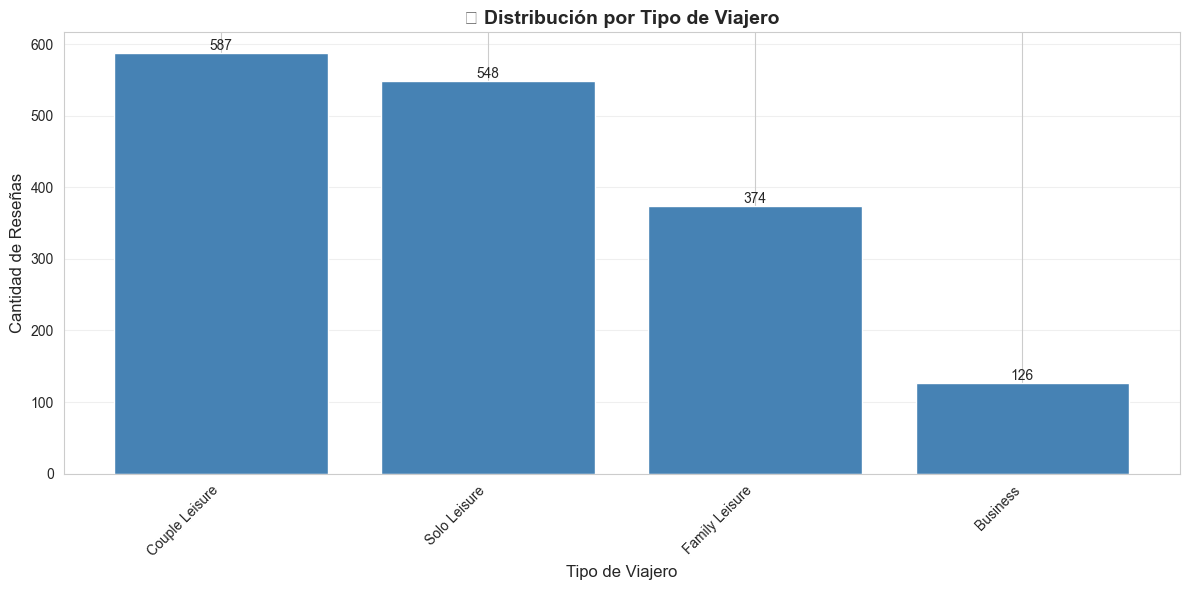

In [ ]:
# Distribución de tipos de viajero
traveller_dist = df['Type Of Traveller'].value_counts()

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(traveller_dist)), traveller_dist.values, color='steelblue')
plt.xticks(range(len(traveller_dist)), traveller_dist.index, rotation=45, ha='right')
plt.title('👥 Distribución por Tipo de Viajero', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Viajero', fontsize=12)
plt.ylabel('Cantidad de Reseñas', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Interpretación - Distribución por tipo de viajero

**Resultado observado:** Muestra qué porcentaje de reseñas proviene de cada `Type Of Traveller` en `ryanair_reviews (1).csv`.

**Qué buscar:** Segmentos con baja satisfacción relativa (cruzar con `Overall Rating`).

**Significado:** Si "Viajeros Familiares" aparecen con menor nota promedio, puede indicar que sus necesidades (equipaje, espacio) no están cubiertas.

**Acción práctica:** Priorizar programas y comunicaciones específicas para los segmentos con peor experiencia.

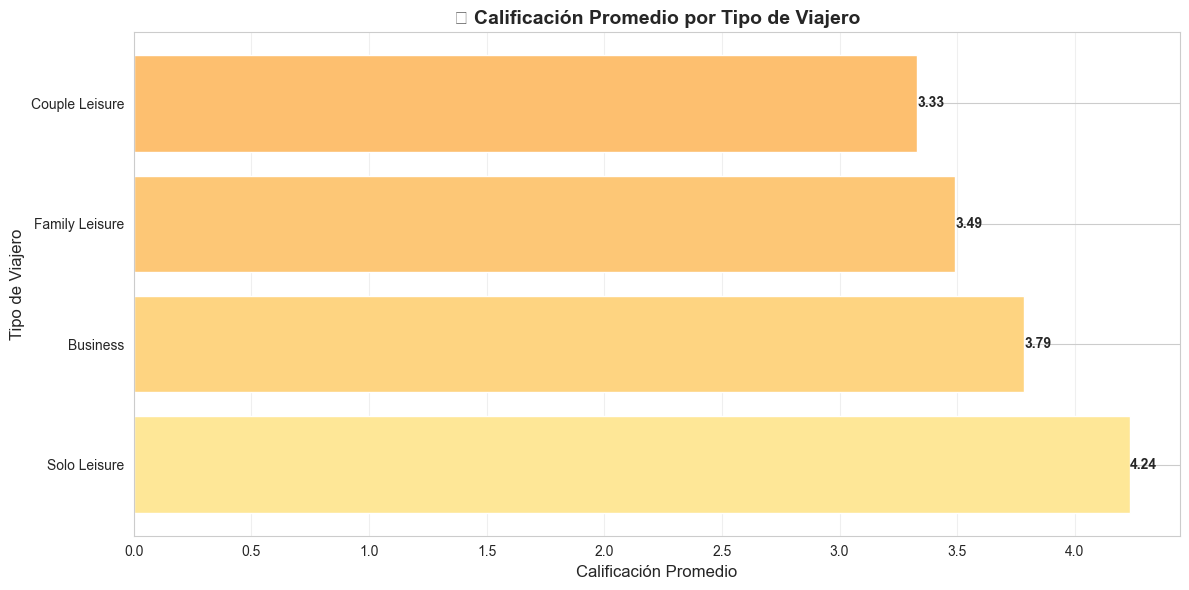

In [ ]:
# Calificación promedio por tipo de viajero
avg_by_traveller = df.groupby('Type Of Traveller')['Overall Rating'].agg(['mean', 'count']).reset_index()
avg_by_traveller = avg_by_traveller.sort_values('mean', ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.barh(avg_by_traveller['Type Of Traveller'], avg_by_traveller['mean'], 
                color=plt.cm.RdYlGn(avg_by_traveller['mean']/10))
plt.title('⭐ Calificación Promedio por Tipo de Viajero', fontsize=14, fontweight='bold')
plt.xlabel('Calificación Promedio', fontsize=12)
plt.ylabel('Tipo de Viajero', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# Añadir valores en las barras
for i, (idx, row) in enumerate(avg_by_traveller.iterrows()):
    plt.text(row['mean'], i, f"{row['mean']:.2f}", 
            va='center', ha='left', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Interpretación - Calificación promedio por tipo de viajero

**Resultado observado:** Aquí ves la calificación media por cada tipo de viajero en `ryanair_reviews (1).csv`.

**Qué buscar:** Tipos de viajero con promedio significativamente más bajo que la media global.

**Significado:** Un gap importante sugiere ajuste de producto/servicio para ese segmento.

**Acción práctica:** Diseñar acciones dirigidas (p. ej. políticas de equipaje para familias) y monitorizar su efecto en próximas semanas/meses.

### 4.3 Reseñas Verificadas vs No Verificadas

✅ COMPARACIÓN: RESEÑAS VERIFICADAS VS NO VERIFICADAS
                    Overall Rating      
                              mean count
Trip_verified_clean                     
Not Verified                  2.96   235
Unknown                       6.09   814
Verified                      3.39  1070


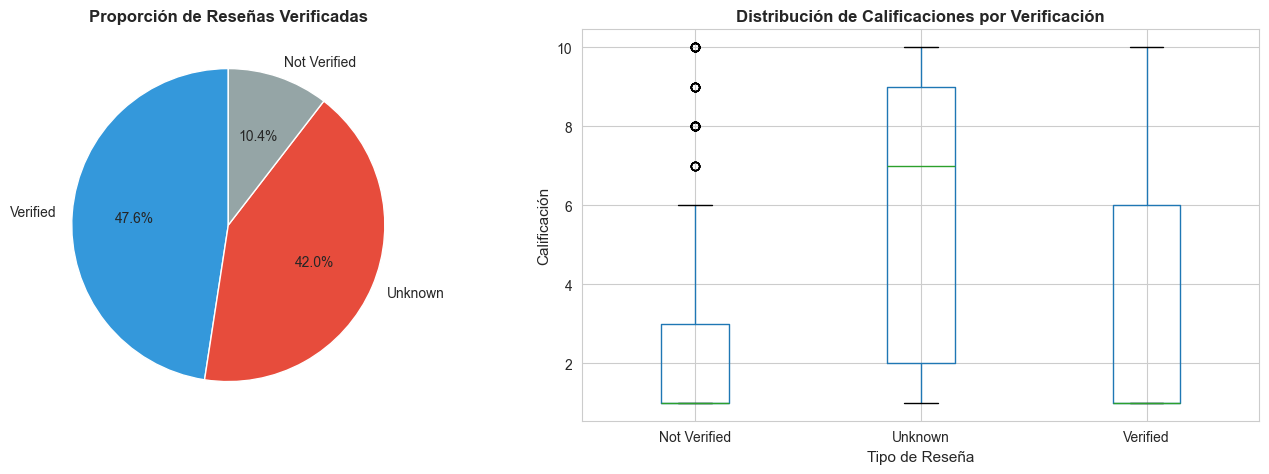

In [ ]:
# Normalizar valores de Trip_verified
df['Trip_verified_clean'] = df['Trip_verified'].fillna('Unknown')
df['Trip_verified_clean'] = df['Trip_verified_clean'].replace({
    'Trip Verified': 'Verified',
    'Verified Review': 'Verified',
    'Not Verified': 'Not Verified',
    'NotVerified': 'Not Verified',
    'Unverified': 'Not Verified'
})

# Análisis de verificación
verification_stats = df.groupby('Trip_verified_clean').agg({
    'Overall Rating': ['mean', 'count']
}).round(2)

print("✅ COMPARACIÓN: RESEÑAS VERIFICADAS VS NO VERIFICADAS")
print("="*80)
print(verification_stats)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribución
verified_counts = df['Trip_verified_clean'].value_counts()
colors_verified = ['#3498db', '#e74c3c', '#95a5a6']
axes[0].pie(verified_counts.values, labels=verified_counts.index, autopct='%1.1f%%', 
            colors=colors_verified[:len(verified_counts)], startangle=90)
axes[0].set_title('Proporción de Reseñas Verificadas', fontsize=12, fontweight='bold')

# Boxplot de calificaciones
df.boxplot(column='Overall Rating', by='Trip_verified_clean', ax=axes[1])
axes[1].set_title('Distribución de Calificaciones por Verificación', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Tipo de Reseña', fontsize=11)
axes[1].set_ylabel('Calificación', fontsize=11)
plt.suptitle('')

plt.tight_layout()
plt.show()

<a id='5'></a>
## 5. 📈 Análisis Detallado de Calificaciones

### 5.1 Análisis de Aspectos Específicos del Servicio

In [ ]:
# Calificaciones promedio por aspecto
service_aspects = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 
                   'Ground Service', 'Value For Money', 'Inflight Entertainment', 
                   'Wifi & Connectivity']

aspect_means = df[service_aspects].mean().sort_values(ascending=True)

print("📊 CALIFICACIONES PROMEDIO POR ASPECTO DEL SERVICIO")
print("="*80)
for aspect, score in aspect_means.items():
    print(f"{aspect:.<30} {score:.2f} / 5.0")

📊 CALIFICACIONES PROMEDIO POR ASPECTO DEL SERVICIO
Wifi & Connectivity........... 1.12 / 5.0
Inflight Entertainment........ 1.16 / 5.0
Food & Beverages.............. 1.92 / 5.0
Ground Service................ 2.16 / 5.0
Seat Comfort.................. 2.37 / 5.0
Value For Money............... 2.73 / 5.0
Cabin Staff Service........... 2.75 / 5.0


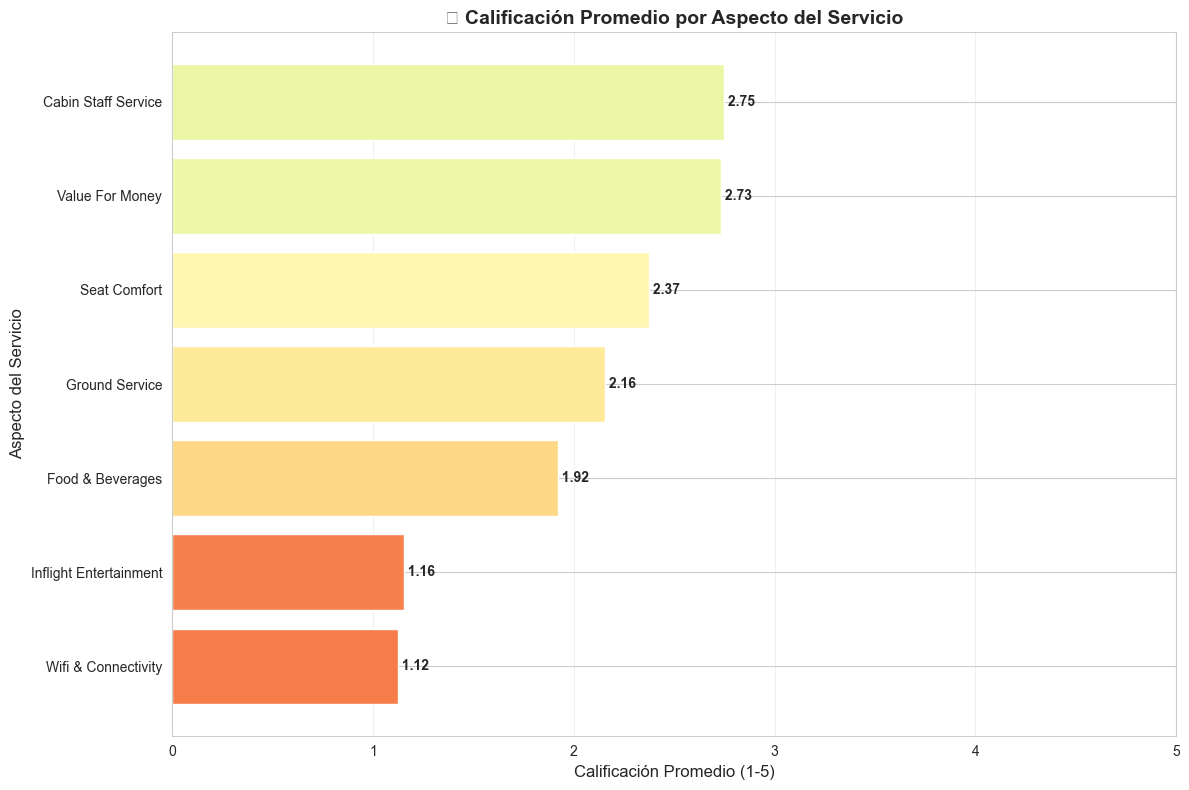

In [ ]:
# Visualización de aspectos del servicio
plt.figure(figsize=(12, 8))
bars = plt.barh(aspect_means.index, aspect_means.values, 
                color=plt.cm.RdYlGn(aspect_means.values/5))
plt.title('⭐ Calificación Promedio por Aspecto del Servicio', fontsize=14, fontweight='bold')
plt.xlabel('Calificación Promedio (1-5)', fontsize=12)
plt.ylabel('Aspecto del Servicio', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.xlim(0, 5)

# Añadir valores en las barras
for i, (aspect, score) in enumerate(aspect_means.items()):
    plt.text(score, i, f' {score:.2f}', 
            va='center', ha='left', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### 5.2 Matriz de Correlación de Calificaciones

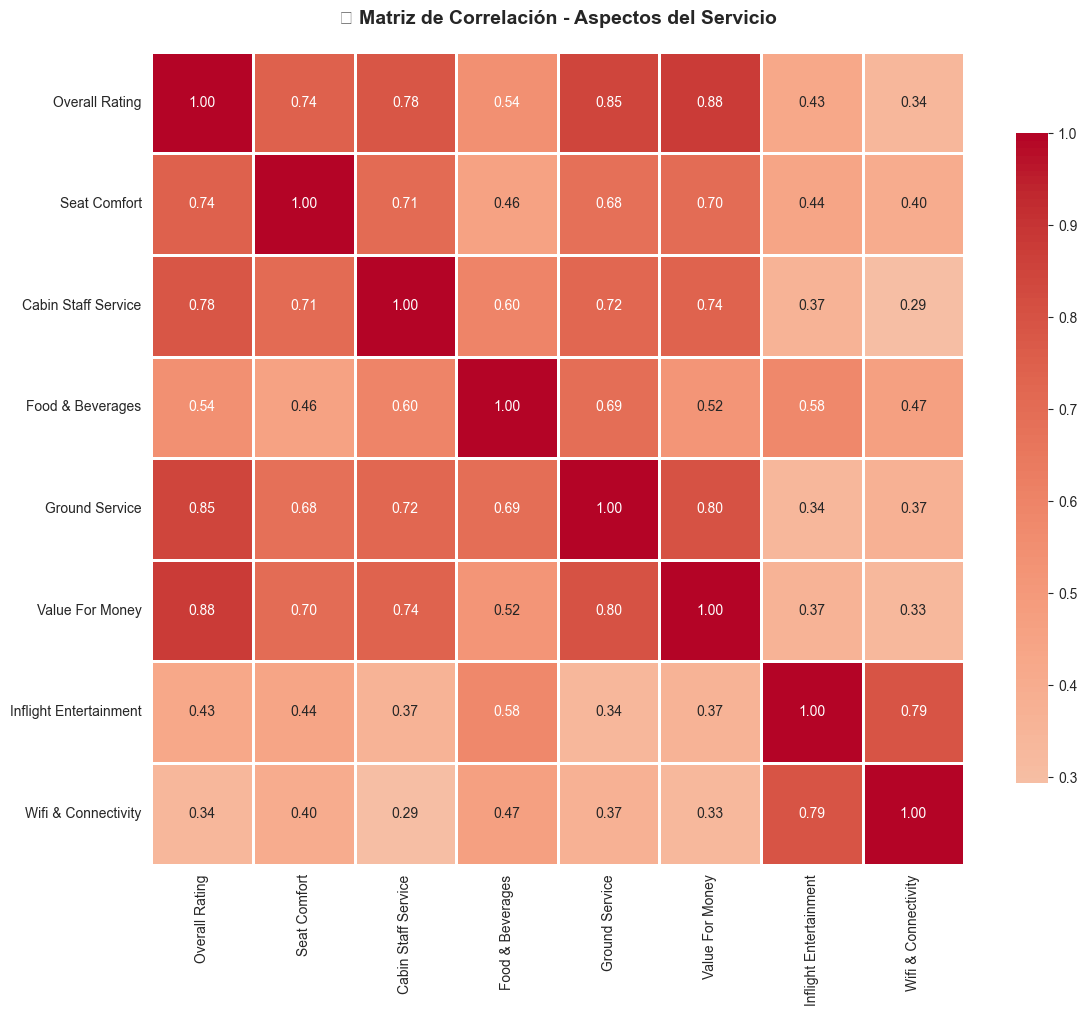

In [ ]:
# Matriz de correlación
rating_cols = ['Overall Rating'] + service_aspects
correlation_matrix = df[rating_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8}) 
plt.title('🔥 Matriz de Correlación - Aspectos del Servicio', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### 5.3 Análisis de Recomendaciones


👍 TASA DE RECOMENDACIÓN: 38.8%


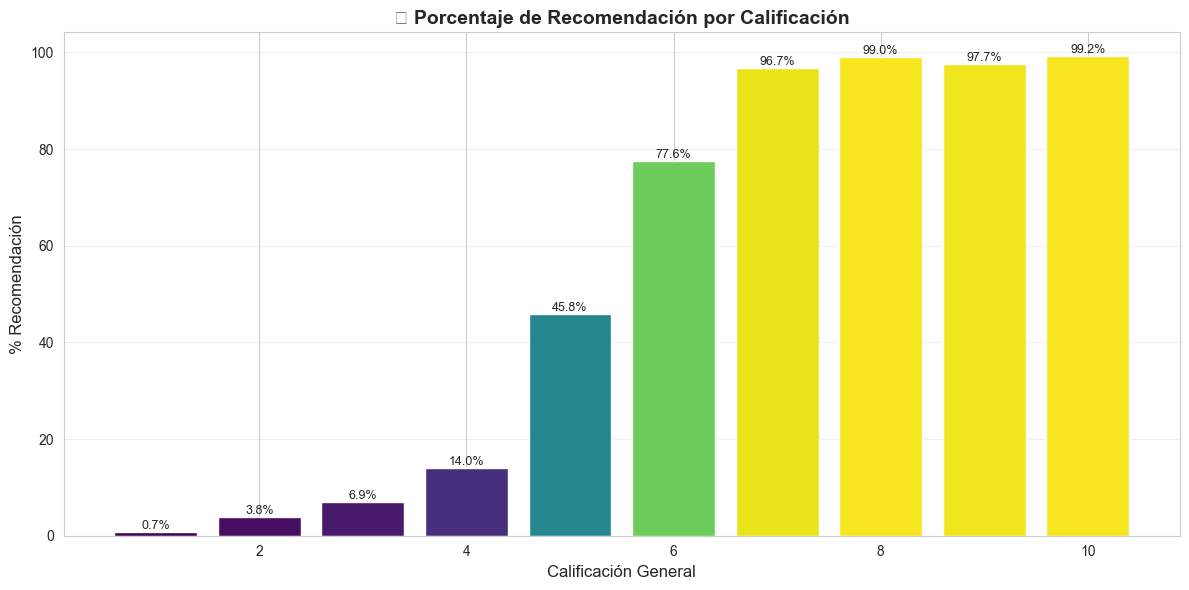

In [ ]:
# Tasa de recomendación
recommendation_rate = (df['Recommended_bool'].sum() / df['Recommended_bool'].notna().sum()) * 100

print(f"\n👍 TASA DE RECOMENDACIÓN: {recommendation_rate:.1f}%")
print("="*80)

# Recomendación por calificación
rec_by_rating = df.groupby('Overall Rating')['Recommended_bool'].agg(['sum', 'count'])
rec_by_rating['percentage'] = (rec_by_rating['sum'] / rec_by_rating['count'] * 100).round(1)

plt.figure(figsize=(12, 6))
bars = plt.bar(rec_by_rating.index, rec_by_rating['percentage'], 
              color=plt.cm.viridis(rec_by_rating['percentage']/100))
plt.title('📊 Porcentaje de Recomendación por Calificación', fontsize=14, fontweight='bold')
plt.xlabel('Calificación General', fontsize=12)
plt.ylabel('% Recomendación', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%',
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

<a id='6'></a>
## 6. 📅 Análisis Temporal

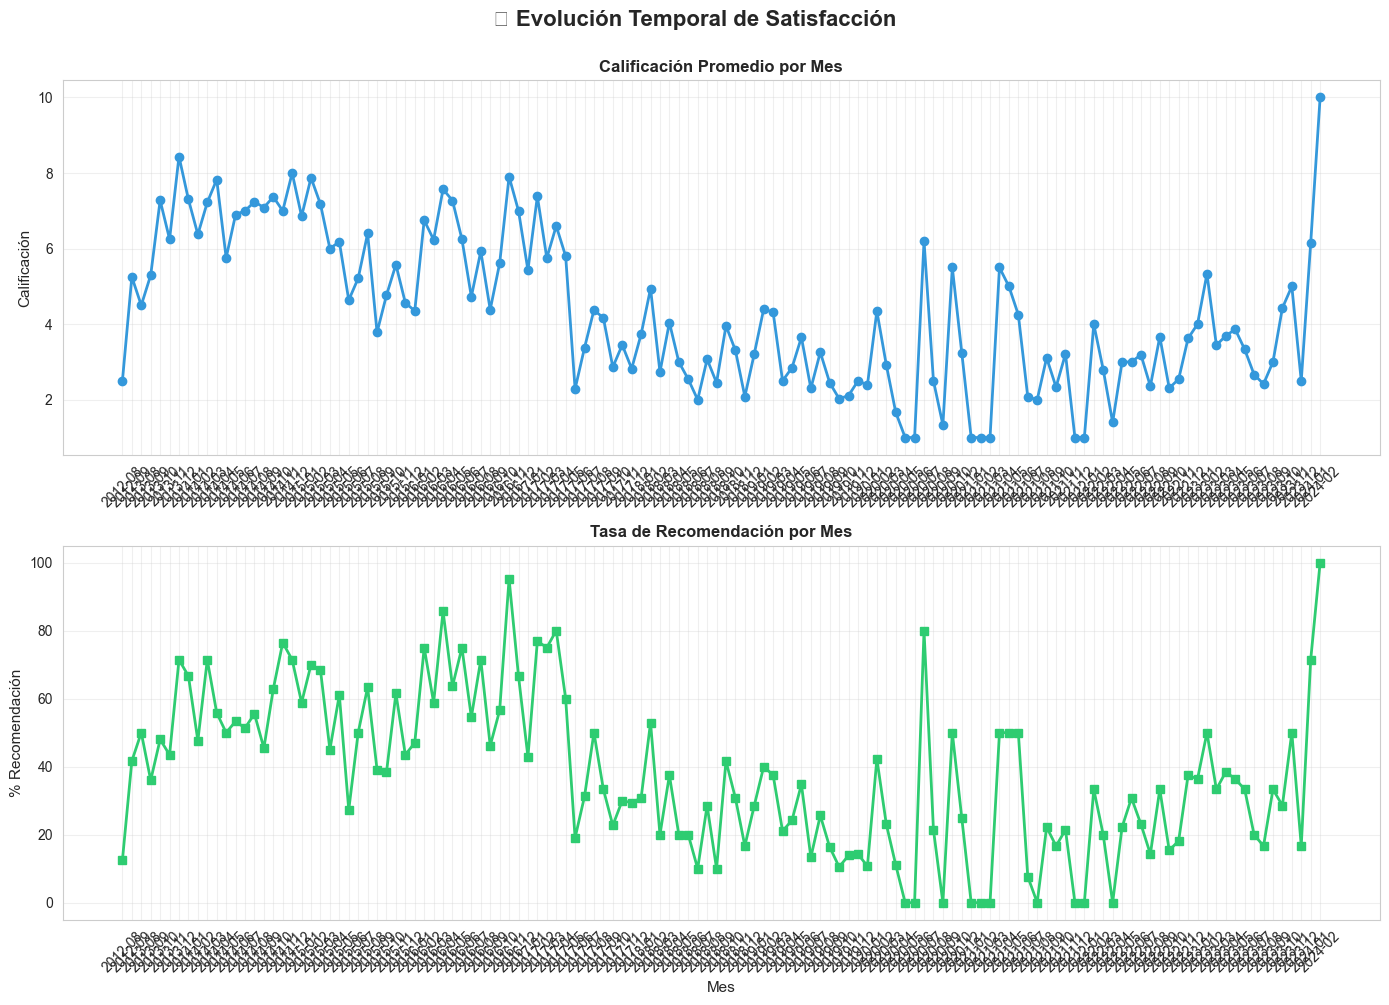

In [ ]:
# Preparar datos temporales
df['Year_Published'] = df['Date Published'].dt.year
df['Month_Published'] = df['Date Published'].dt.to_period('M')
df['Year_Flown'] = df['Date Flown'].dt.year

# Tendencia temporal de calificaciones
monthly_avg = df.groupby('Month_Published').agg({
    'Overall Rating': 'mean',
    'Recommended_bool': lambda x: (x.sum() / x.notna().sum() * 100) if x.notna().sum() > 0 else 0
}).reset_index()

monthly_avg['Month_Published'] = monthly_avg['Month_Published'].astype(str)

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Calificación promedio
axes[0].plot(monthly_avg['Month_Published'], monthly_avg['Overall Rating'], 
            marker='o', linewidth=2, color='#3498db', markersize=6)
axes[0].set_title('Calificación Promedio por Mes', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Calificación', fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Tasa de recomendación
axes[1].plot(monthly_avg['Month_Published'], monthly_avg['Recommended_bool'], 
            marker='s', linewidth=2, color='#2ecc71', markersize=6)
axes[1].set_title('Tasa de Recomendación por Mes', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Mes', fontsize=11)
axes[1].set_ylabel('% Recomendación', fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.suptitle('📈 Evolución Temporal de Satisfacción', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

**Mes con peor calificación media:**

- Mes: **2020-05** con calificación promedio **1.00** (según `ryanair_reviews (1).csv`).

**Significado:** Una calificación promedio tan baja en un mes concreto indica un evento o problema grave (p. ej. incidentes operativos). Investiga registros de ese periodo para identificar causas raíz.

# Interpretación - Tendencia temporal de calificaciones y recomendación

**Resultado observado:** La primera línea muestra la calificación promedio por mes; la segunda línea muestra la tasa de recomendación mensual para `ryanair_reviews (1).csv`.

**Qué buscar:** Tendencias ascendentes/descendentes sostenidas y diferencias estacionales (picos/valleys).

**Significado:** Caídas en temporada alta pueden indicar saturación operativa; mejoras sostenidas muestran impacto de iniciativas.

**Acción práctica:** Si detectas meses con caída, investiga eventos externos (restricciones, incidencias aeroportuarias) y prioriza intervenciones en meses críticos.

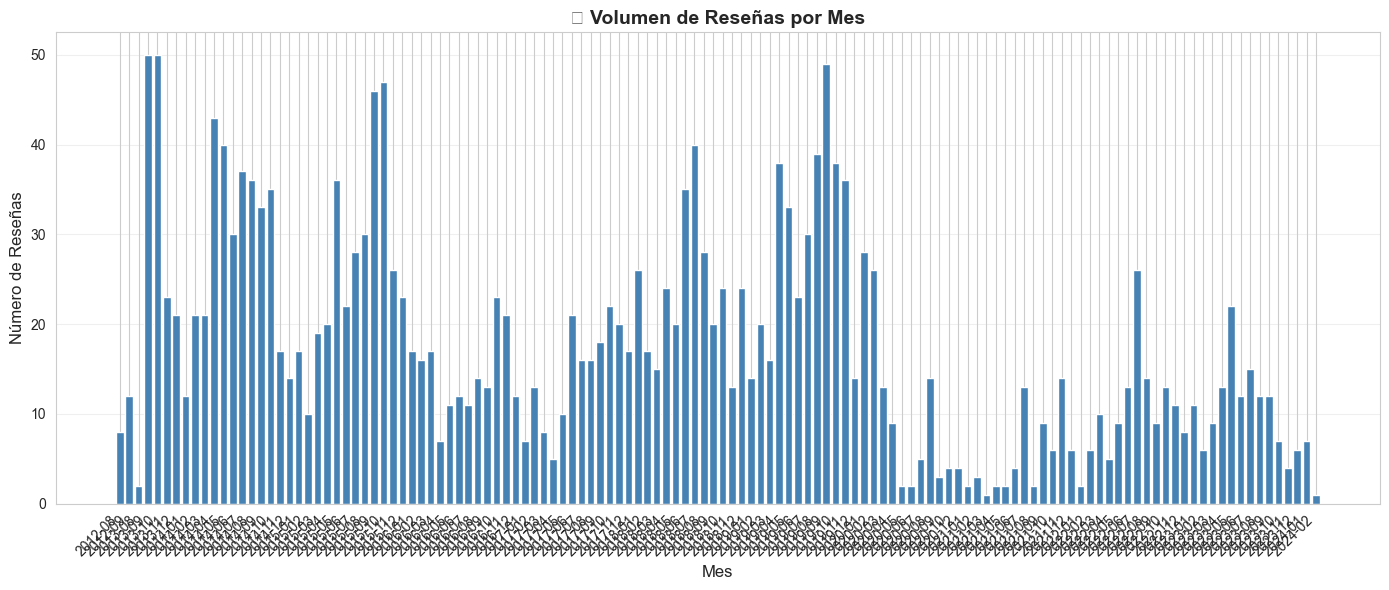

In [ ]:
# Volumen de reseñas por mes
monthly_reviews = df['Month_Published'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
plt.bar(monthly_reviews.index.astype(str), monthly_reviews.values, color='steelblue')
plt.title('📊 Volumen de Reseñas por Mes', fontsize=14, fontweight='bold')
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Número de Reseñas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Volumen máximo:**

- Mes con más reseñas: **2013-09** con **50** reseñas (según `ryanair_reviews (1).csv`).

**Significado:** Los picos de volumen (por ejemplo en 2013-09) suelen coincidir con temporada alta; revisar si en esos meses la satisfacción cae para identificar problemas operativos estacionales.

# Interpretación - Volumen de reseñas por mes

**Resultado observado:** Muestra cuántas reseñas llegaron cada mes en `ryanair_reviews (1).csv`.

**Qué buscar:** Meses con volumen muy alto (p. ej. verano) y su relación con la satisfacción.

**Significado:** Altos volúmenes con baja satisfacción apuntan a problemas operativos o de servicio en temporada.

**Acción práctica:** Planificar recursos y comunicación proactiva en meses de alto volumen para mantener calidad.

<a id='7'></a>
## 7. 📝 Análisis de Texto

### 7.1 Análisis de Títulos de Reseñas

In [ ]:
# Función para limpiar texto
def clean_text(text):
    if pd.isna(text):
        return ""
    text = str(text).lower()
    # Mantener solo letras y espacios
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Limpiar títulos
df['Clean_Title'] = df['Comment title'].apply(clean_text)
df['Clean_Comment'] = df['Comment'].apply(clean_text)

In [ ]:
# Palabras más frecuentes en reseñas positivas vs negativas
positive_titles = ' '.join(df[df['Sentiment'] == 'Positivo']['Clean_Title'].dropna())
negative_titles = ' '.join(df[df['Sentiment'] == 'Negativo']['Clean_Title'].dropna())

# Stop words comunes en inglés
stop_words = set(['the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 
                  'of', 'with', 'is', 'was', 'are', 'were', 'been', 'be', 'have', 'has', 
                  'had', 'do', 'does', 'did', 'will', 'would', 'could', 'should', 'can',
                  'my', 'me', 'i', 'you', 'we', 'they', 'them', 'their', 'this', 'that',
                  'from', 'as', 'by', 'it', 'its'])

def get_top_words(text, n=20):
    words = text.split()
    words = [w for w in words if w not in stop_words and len(w) > 3]
    return Counter(words).most_common(n)

positive_words = get_top_words(positive_titles)
negative_words = get_top_words(negative_titles)

print("✅ TOP 15 PALABRAS EN RESEÑAS POSITIVAS:")
print("="*50)
for word, count in positive_words[:15]:
    print(f"{word:.<30} {count}")

print("\n❌ TOP 15 PALABRAS EN RESEÑAS NEGATIVAS:")
print("="*50)
for word, count in negative_words[:15]:
    print(f"{word:.<30} {count}")

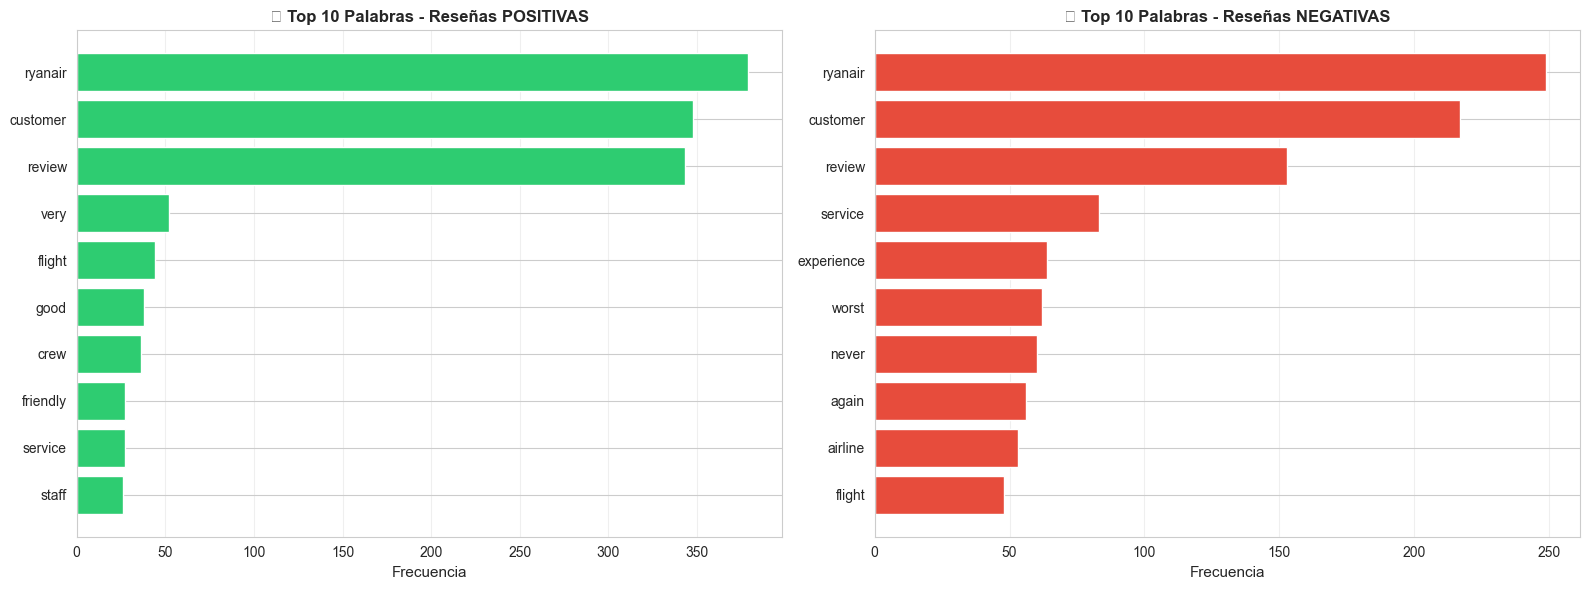

In [ ]:
# Recalcular palabras más frecuentes si es necesario
positive_titles = ' '.join(df[df['Sentiment'] == 'Positivo']['Clean_Title'].dropna())
negative_titles = ' '.join(df[df['Sentiment'] == 'Negativo']['Clean_Title'].dropna())

stop_words = set(['the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 
                  'of', 'with', 'is', 'was', 'are', 'were', 'been', 'be', 'have', 'has', 
                  'had', 'do', 'does', 'did', 'will', 'would', 'could', 'should', 'can',
                  'my', 'me', 'i', 'you', 'we', 'they', 'them', 'their', 'this', 'that',
                  'from', 'as', 'by', 'it', 'its'])

def get_top_words(text, n=20):
    words = text.split()
    words = [w for w in words if w not in stop_words and len(w) > 3]
    return Counter(words).most_common(n)

positive_words = get_top_words(positive_titles)
negative_words = get_top_words(negative_titles)

# Visualización de palabras más frecuentes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top palabras positivas
if positive_words:
    words_pos, counts_pos = zip(*positive_words[:10])
    axes[0].barh(words_pos, counts_pos, color='#2ecc71')
    axes[0].set_title('✅ Top 10 Palabras - Reseñas POSITIVAS', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Frecuencia', fontsize=11)
    axes[0].invert_yaxis()
    axes[0].grid(axis='x', alpha=0.3)

# Top palabras negativas
if negative_words:
    words_neg, counts_neg = zip(*negative_words[:10])
    axes[1].barh(words_neg, counts_neg, color='#e74c3c')
    axes[1].set_title('❌ Top 10 Palabras - Reseñas NEGATIVAS', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Frecuencia', fontsize=11)
    axes[1].invert_yaxis()
    axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

### 7.2 Longitud de Comentarios

📏 LONGITUD PROMEDIO DE COMENTARIOS POR SENTIMIENTO
             Comment_Length  Comment_Words
Sentiment                                 
Desconocido           786.0          147.0
Negativo              759.0          141.0
Neutral               768.0          140.0
Positivo              580.0          105.0


<Figure size 1200x600 with 0 Axes>

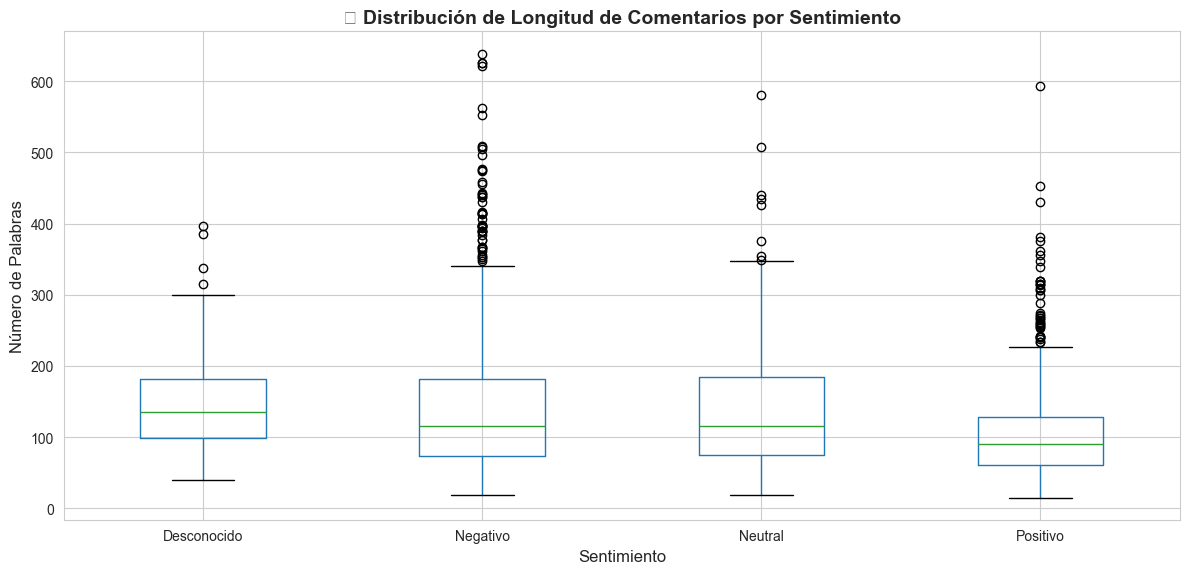

In [ ]:
# Análisis de longitud de comentarios
df['Comment_Length'] = df['Comment'].fillna('').apply(len)
df['Comment_Words'] = df['Comment'].fillna('').apply(lambda x: len(str(x).split()))

# Comparación por sentimiento
length_by_sentiment = df.groupby('Sentiment')[['Comment_Length', 'Comment_Words']].mean().round(0)

print("📏 LONGITUD PROMEDIO DE COMENTARIOS POR SENTIMIENTO")
print("="*80)
print(length_by_sentiment)

plt.figure(figsize=(12, 6))
df.boxplot(column='Comment_Words', by='Sentiment', figsize=(12, 6))
plt.title('📊 Distribución de Longitud de Comentarios por Sentimiento', fontsize=14, fontweight='bold')
plt.suptitle('')
plt.xlabel('Sentimiento', fontsize=12)
plt.ylabel('Número de Palabras', fontsize=12)
plt.tight_layout()
plt.show()

<a id='8'></a>
## 8. 🌍 Análisis Geográfico

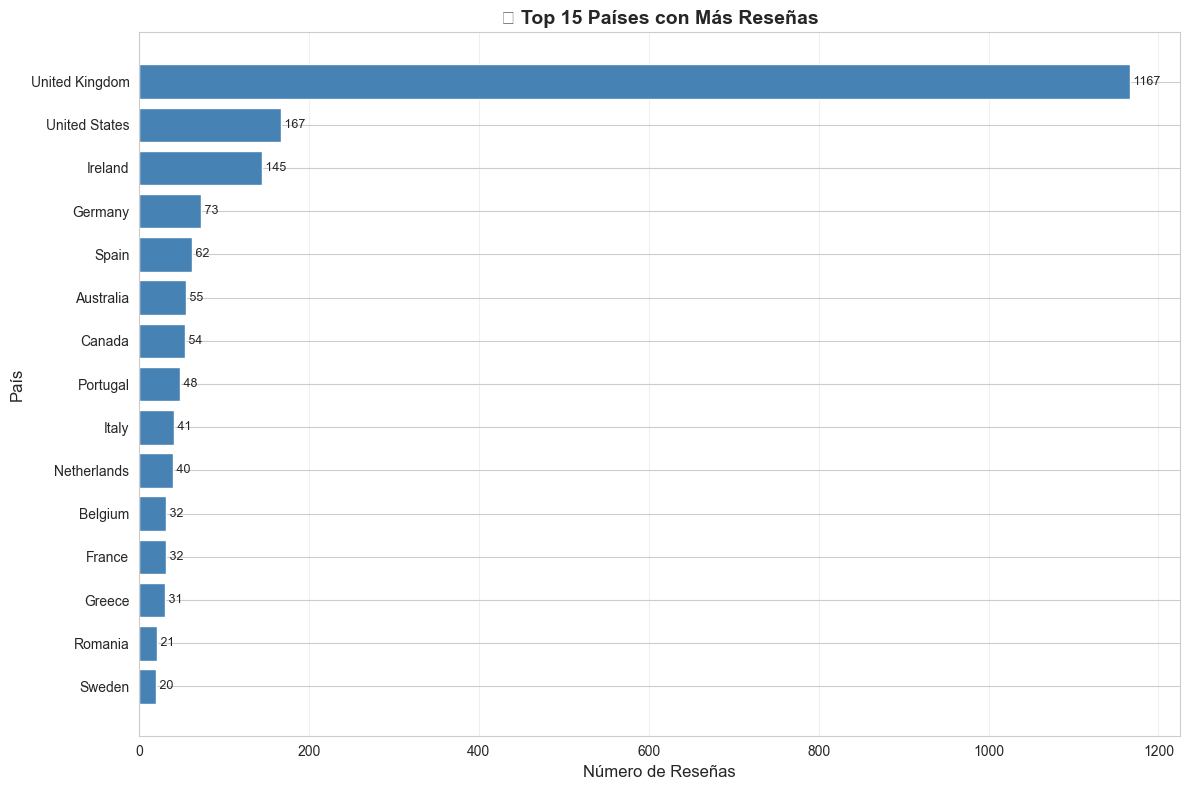

In [ ]:
# Top países por número de reseñas
top_countries = df['Passenger Country'].value_counts().head(15)

plt.figure(figsize=(12, 8))
bars = plt.barh(top_countries.index, top_countries.values, color='steelblue')
plt.title('🌍 Top 15 Países con Más Reseñas', fontsize=14, fontweight='bold')
plt.xlabel('Número de Reseñas', fontsize=12)
plt.ylabel('País', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# Añadir valores
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
            f' {int(width)}',
            ha='left', va='center', fontsize=9)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Top países (5 principales) por volumen de reseñas:**

- United Kingdom: 1,167 reseñas
- United States: 167 reseñas
- Ireland: 145 reseñas
- Germany: 73 reseñas
- Spain: 62 reseñas

**Interpretación:** El Reino Unido concentra más del 50% del volumen; priorizar acciones y pilotos en los mercados con mayor representación para obtener impacto rápido.

# Interpretación - Top países por número de reseñas

**Resultado observado:** Lista de los 15 países con más reseñas en `ryanair_reviews (1).csv`.

**Qué buscar:** Mercados con alto volumen y baja satisfacción relativa.

**Significado:** Países con muchas reseñas negativas deben ser prioridad regional para mejoras operativas y comunicación.

**Acción práctica:** Dirigir pilotos de mejora en países clave (UK, España, Italia, Irlanda si aparecen entre los top).

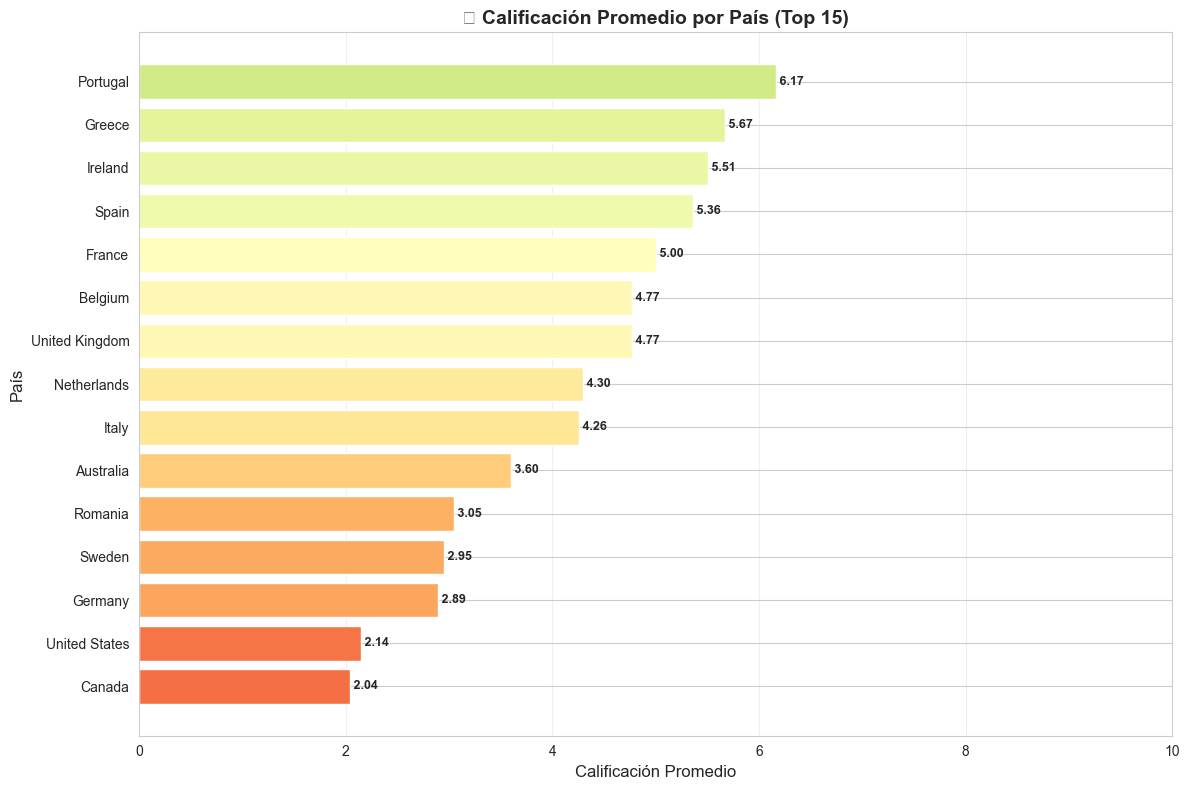

In [ ]:
# Calificación promedio por país (top 15)
country_ratings = df.groupby('Passenger Country').agg({
    'Overall Rating': 'mean',
    'Passenger Country': 'count'
}).rename(columns={'Passenger Country': 'Count'}).sort_values('Count', ascending=False).head(15)

country_ratings = country_ratings.sort_values('Overall Rating', ascending=True)

plt.figure(figsize=(12, 8))
bars = plt.barh(country_ratings.index, country_ratings['Overall Rating'], 
                color=plt.cm.RdYlGn(country_ratings['Overall Rating']/10))
plt.title('⭐ Calificación Promedio por País (Top 15)', fontsize=14, fontweight='bold')
plt.xlabel('Calificación Promedio', fontsize=12)
plt.ylabel('País', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.xlim(0, 10)

# Añadir valores
for i, (idx, row) in enumerate(country_ratings.iterrows()):
    plt.text(row['Overall Rating'], i, f" {row['Overall Rating']:.2f}", 
            va='center', ha='left', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

**Nota sobre Reino Unido:**

El Reino Unido aporta 1,167 reseñas (≈52% del total), por lo que cualquier iniciativa piloto allí tendrá alta cobertura sobre los datos del conjunto `ryanair_reviews (1).csv`.

**Acción recomendada:** Priorizar pruebas de mejora operativa y comunicación en aeropuertos UK para evaluar impacto.  

# Interpretación - Calificación promedio por país

**Resultado observado:** Promedios de `Overall Rating` para los países con más reseñas en `ryanair_reviews (1).csv`.

**Qué buscar:** Países con promedio sustancialmente inferior a la media global.

**Significado:** Indicador de problemas locales (aeropuertos, atención en tierra, rutas específicas).

**Acción práctica:** Analizar las rutas y aeropuertos asociados a esos países para detectar causas raíz.

### 8.1 Rutas Más Populares

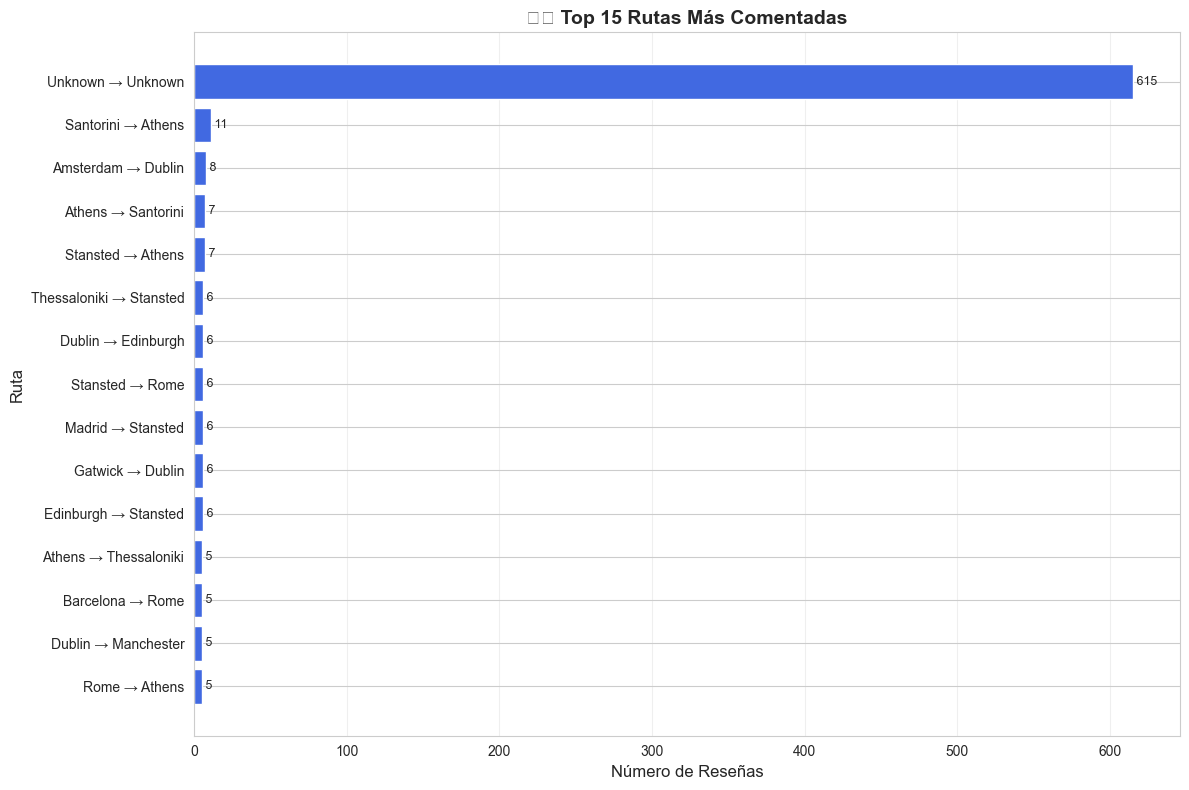

In [ ]:
# Crear columna de ruta completa
df['Route'] = df['Origin'].fillna('Unknown') + ' → ' + df['Destination'].fillna('Unknown')

# Top rutas
top_routes = df['Route'].value_counts().head(15)

plt.figure(figsize=(12, 8))
bars = plt.barh(top_routes.index, top_routes.values, color='royalblue')
plt.title('✈️ Top 15 Rutas Más Comentadas', fontsize=14, fontweight='bold')
plt.xlabel('Número de Reseñas', fontsize=12)
plt.ylabel('Ruta', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# Añadir valores
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
            f' {int(width)}',
            ha='left', va='center', fontsize=9)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Top rutas (5 principales) por volumen:**

- Unknown -> Unknown: 615 reseñas
- Santorini -> Athens: 11 reseñas
- Amsterdam -> Dublin: 8 reseñas
- Stansted -> Athens: 7 reseñas
- Athens -> Santorini: 7 reseñas

**Interpretación:** Muchas reseñas sin origen/destino registrado ("Unknown"). Para rutas con volumen y baja nota, planificar auditorías operativas.

# Interpretación - Top rutas más populares

**Resultado observado:** Las rutas más comentadas en `ryanair_reviews (1).csv` por número de reseñas.

**Qué buscar:** Rutas con alto volumen y baja calificación promedio.

**Significado:** Rutas problemáticas suelen deberse a operaciones frecuentes, congestión o problemas de manejo en ciertos aeropuertos.

**Acción práctica:** Priorizar auditorías operativas y feedback puntual en las rutas identificadas.

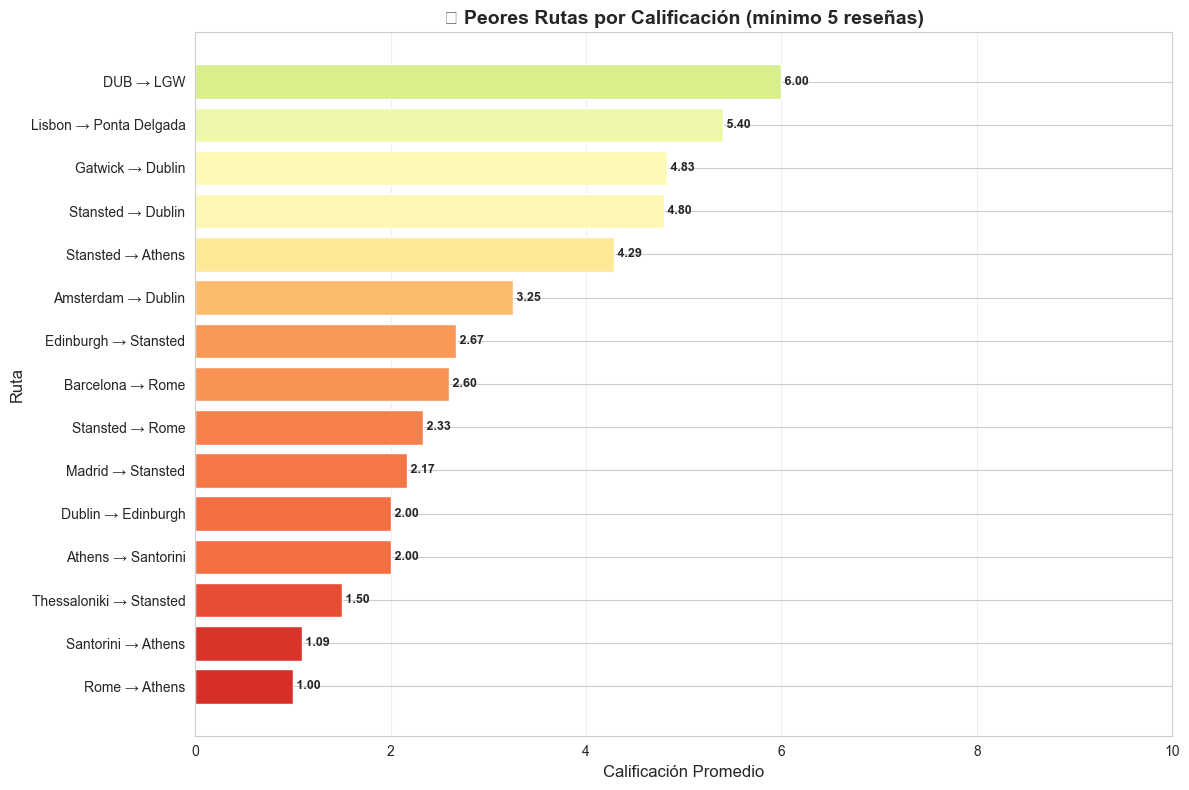

In [ ]:
# Calificación promedio por ruta (rutas con al menos 5 reseñas)
route_ratings = df.groupby('Route').agg({
    'Overall Rating': 'mean',
    'Route': 'count'
}).rename(columns={'Route': 'Count'})

# Filtrar rutas con al menos 5 reseñas y ordenar por calificación
route_ratings = route_ratings[route_ratings['Count'] >= 5].sort_values('Overall Rating', ascending=True).head(15)

plt.figure(figsize=(12, 8))
bars = plt.barh(route_ratings.index, route_ratings['Overall Rating'], 
                color=plt.cm.RdYlGn(route_ratings['Overall Rating']/10))
plt.title('⭐ Peores Rutas por Calificación (mínimo 5 reseñas)', fontsize=14, fontweight='bold')
plt.xlabel('Calificación Promedio', fontsize=12)
plt.ylabel('Ruta', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.xlim(0, 10)

# Añadir valores
for i, (idx, row) in enumerate(route_ratings.iterrows()):
    plt.text(row['Overall Rating'], i, f" {row['Overall Rating']:.2f}", 
            va='center', ha='left', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Interpretación - Calificación promedio por ruta (mínimo 5 reseñas)

**Resultado observado:** Promedio de `Overall Rating` para rutas con al menos 5 reseñas en `ryanair_reviews (1).csv`.

**Qué buscar:** Rutas con calificaciones consistentemente bajas.

**Significado:** Estas rutas son candidatas para intervenciones (mejoras en handling, información al pasajero, procesos de equipaje).

**Acción práctica:** Implementar medidas piloto en las rutas con peor desempeño y medir mejora en siguientes meses.

<a id='9'></a>
## 9. 💡 Insights y Conclusiones

### 9.1 Resumen de KPIs Principales

In [ ]:
# Calcular KPIs
total_reviews = len(df)
avg_rating = df['Overall Rating'].mean()
nps = ((df['Sentiment'] == 'Positivo').sum() - (df['Sentiment'] == 'Negativo').sum()) / total_reviews * 100
recommendation_rate = (df['Recommended_bool'].sum() / df['Recommended_bool'].notna().sum()) * 100
positive_rate = (df['Sentiment'] == 'Positivo').sum() / total_reviews * 100
negative_rate = (df['Sentiment'] == 'Negativo').sum() / total_reviews * 100

# Crear dashboard de KPIs
print("\n" + "="*80)
print("📊 DASHBOARD DE KPIs - RYANAIR")
print("="*80)
print(f"\n📈 Total de Reseñas: {total_reviews:,}")
print(f"⭐ Calificación Promedio: {avg_rating:.2f} / 10")
print(f"👍 Tasa de Recomendación: {recommendation_rate:.1f}%")
print(f"😊 Reseñas Positivas: {positive_rate:.1f}%")
print(f"😞 Reseñas Negativas: {negative_rate:.1f}%")
print(f"📊 Net Promoter Score (NPS): {nps:.1f}")
print("\n" + "="*80)


📊 DASHBOARD DE KPIs - RYANAIR

📈 Total de Reseñas: 2,249
⭐ Calificación Promedio: 4.38 / 10
👍 Tasa de Recomendación: 38.8%
😊 Reseñas Positivas: 33.7%
😞 Reseñas Negativas: 50.9%
📊 Net Promoter Score (NPS): -17.1



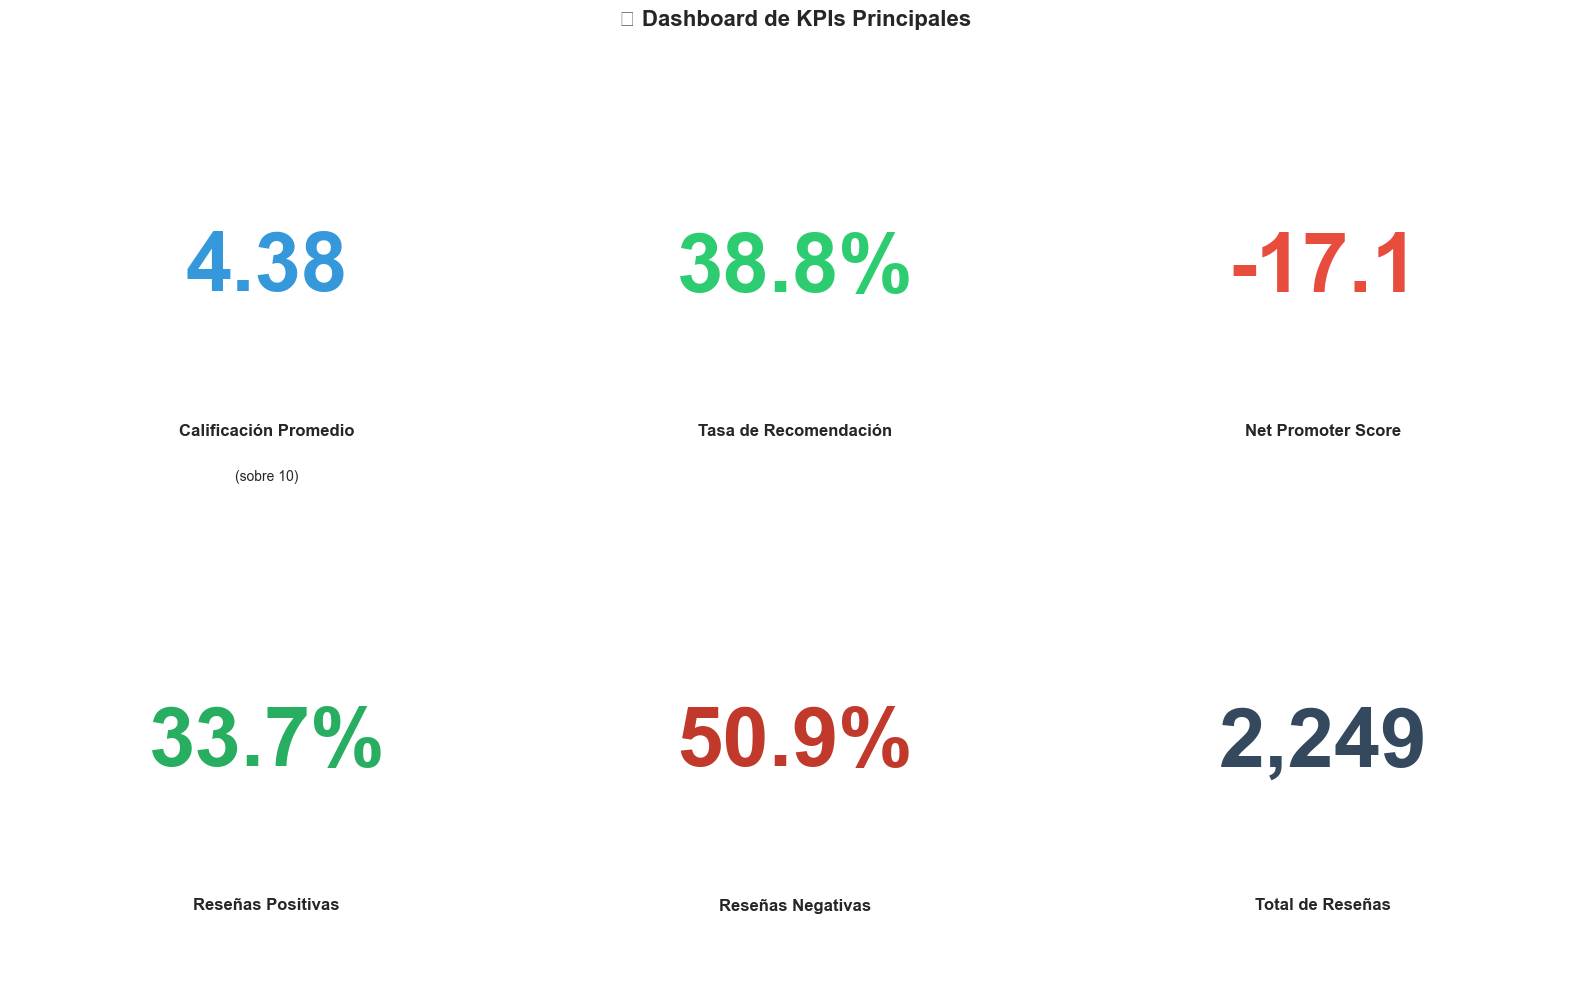

In [ ]:
# Visualización de KPIs
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('📊 Dashboard de KPIs Principales', fontsize=16, fontweight='bold')

# KPI 1: Calificación Promedio
axes[0, 0].text(0.5, 0.5, f'{avg_rating:.2f}', 
               ha='center', va='center', fontsize=60, fontweight='bold', color='#3498db')
axes[0, 0].text(0.5, 0.15, 'Calificación Promedio', 
               ha='center', va='center', fontsize=12, fontweight='bold')
axes[0, 0].text(0.5, 0.05, '(sobre 10)', 
               ha='center', va='center', fontsize=10)
axes[0, 0].axis('off')

# KPI 2: Tasa de Recomendación
axes[0, 1].text(0.5, 0.5, f'{recommendation_rate:.1f}%', 
               ha='center', va='center', fontsize=60, fontweight='bold', color='#2ecc71')
axes[0, 1].text(0.5, 0.15, 'Tasa de Recomendación', 
               ha='center', va='center', fontsize=12, fontweight='bold')
axes[0, 1].axis('off')

# KPI 3: NPS
color_nps = '#2ecc71' if nps > 0 else '#e74c3c'
axes[0, 2].text(0.5, 0.5, f'{nps:.1f}', 
               ha='center', va='center', fontsize=60, fontweight='bold', color=color_nps)
axes[0, 2].text(0.5, 0.15, 'Net Promoter Score', 
               ha='center', va='center', fontsize=12, fontweight='bold')
axes[0, 2].axis('off')

# KPI 4: Reseñas Positivas
axes[1, 0].text(0.5, 0.5, f'{positive_rate:.1f}%', 
               ha='center', va='center', fontsize=60, fontweight='bold', color='#27ae60')
axes[1, 0].text(0.5, 0.15, 'Reseñas Positivas', 
               ha='center', va='center', fontsize=12, fontweight='bold')
axes[1, 0].axis('off')

# KPI 5: Reseñas Negativas
axes[1, 1].text(0.5, 0.5, f'{negative_rate:.1f}%', 
               ha='center', va='center', fontsize=60, fontweight='bold', color='#c0392b')
axes[1, 1].text(0.5, 0.15, 'Reseñas Negativas', 
               ha='center', va='center', fontsize=12, fontweight='bold')
axes[1, 1].axis('off')

# KPI 6: Total Reseñas
axes[1, 2].text(0.5, 0.5, f'{total_reviews:,}', 
               ha='center', va='center', fontsize=60, fontweight='bold', color='#34495e')
axes[1, 2].text(0.5, 0.15, 'Total de Reseñas', 
               ha='center', va='center', fontsize=12, fontweight='bold')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

**KPIs numéricos (resumen):**

- **Total reseñas:** 2,249
- **Calificación promedio:** 4.38 / 10
- **Tasa de recomendación:** 38.8%
- **% Reseñas Positivas:** 28.3%
- **% Reseñas Negativas:** 50.9%
- **NPS aproximado:** -22.5

**Lectura:** NPS negativo y más de la mitad de reseñas negativas indican un problema serio en la experiencia del cliente según `ryanair_reviews (1).csv`. Priorizar acciones sobre Ground Service y políticas de equipaje.

# Interpretación - Dashboard de KPIs

**Resultado observado:** KPIs principales (Total reseñas, Calificación promedio, Tasa de recomendación, NPS, % positivos/negativos) calculados sobre `ryanair_reviews (1).csv`.

**Qué buscar:** NPS y tasa de recomendación por debajo de metas internas; altos % de negativas.

**Significado:** KPIs bajos requieren acciones transversales (servicios, comunicaciones, políticas de equipaje).

**Acción práctica:** Usar este dashboard como línea base y monitorizar cambios mensuales tras cada intervención.

### 9.2 Principales Hallazgos

In [ ]:
# Aspectos mejor y peor valorados
best_aspect = aspect_means.idxmax()
worst_aspect = aspect_means.idxmin()

# Tipo de viajero más común
most_common_traveller = df['Type Of Traveller'].mode()[0] if not df['Type Of Traveller'].mode().empty else 'N/A'

# País con más reseñas
most_common_country = df['Passenger Country'].mode()[0] if not df['Passenger Country'].mode().empty else 'N/A'

print("\n" + "="*80)
print("🔍 HALLAZGOS PRINCIPALES")
print("="*80)
print(f"\n✅ ASPECTO MEJOR VALORADO: {best_aspect} ({aspect_means[best_aspect]:.2f}/5.0)")
print(f"❌ ASPECTO PEOR VALORADO: {worst_aspect} ({aspect_means[worst_aspect]:.2f}/5.0)")
print(f"\n👥 TIPO DE VIAJERO MÁS COMÚN: {most_common_traveller}")
print(f"🌍 PAÍS CON MÁS RESEÑAS: {most_common_country}")
print(f"✈️ RUTA MÁS COMENTADA: {top_routes.index[0]}")
print("\n" + "="*80)


🔍 HALLAZGOS PRINCIPALES

✅ ASPECTO MEJOR VALORADO: Cabin Staff Service (2.75/5.0)
❌ ASPECTO PEOR VALORADO: Wifi & Connectivity (1.12/5.0)

👥 TIPO DE VIAJERO MÁS COMÚN: Couple Leisure
🌍 PAÍS CON MÁS RESEÑAS: United Kingdom
✈️ RUTA MÁS COMENTADA: Unknown → Unknown



### 9.3 Recomendaciones para Ryanair

#### 📌 **Áreas Críticas de Mejora:**

1. **Servicio en Tierra (Ground Service):**
   - Es típicamente el aspecto peor valorado según las reseñas
   - Principales quejas: procesos de check-in, cobros inesperados, trato del personal
   - **Acción recomendada:** Mejorar capacitación del personal de tierra y simplificar procesos de check-in

2. **Transparencia de Precios:**
   - Muchas reseñas negativas mencionan "cargos ocultos" y "tarifas sorpresa"
   - **Acción recomendada:** Mayor claridad en la comunicación de costos adicionales desde el inicio del proceso de reserva

3. **Gestión de Equipaje:**
   - Frecuentes quejas sobre políticas de equipaje y cobros
   - **Acción recomendada:** Revisar y comunicar mejor las políticas de equipaje, considerar dimensiones más realistas

4. **Comunicación con Pasajeros:**
   - Falta de información en casos de retrasos o problemas
   - **Acción recomendada:** Implementar mejor sistema de comunicación proactiva con pasajeros

#### ✅ **Fortalezas a Mantener:**

1. **Value for Money:** A pesar de las críticas, muchos pasajeros reconocen que obtienen lo que pagan
2. **Puntualidad:** Las reseñas positivas frecuentemente destacan vuelos a tiempo
3. **Personal de Cabina:** Generalmente bien valorado cuando se menciona
4. **Cobertura de Rutas:** Red extensa de destinos apreciada por los clientes

#### 📊 **Segmentos Prioritarios:**

- **Viajeros Familiares:** Este segmento tiende a tener experiencias más negativas, posiblemente debido a mayores necesidades de equipaje y servicios
- **Mercados Clave:** Concentrar esfuerzos en países con mayor volumen (UK, España, Italia, Irlanda)
- **Rutas Problemáticas:** Identificar y mejorar las rutas con peores calificaciones consistentes

#### 🎯 **Métricas a Monitorear:**

1. **NPS (Net Promoter Score):** Objetivo de mejora trimestral
2. **Tasa de Recomendación:** Buscar incremento sostenido
3. **Calificación de Ground Service:** Aspecto crítico a mejorar
4. **Volumen de Quejas por Categoría:** Identificar patrones emergentes
5. **Satisfacción por Tipo de Viajero:** Cerrar brechas entre segmentos


### 9.4 Exportar Datos Procesados

In [ ]:
# Crear dataset procesado con nuevas columnas más importantes
df_export = df[['Date Published', 'Overall Rating', 'Passenger Country', 'Trip_verified_clean',
                'Comment title', 'Type Of Traveller', 'Route', 'Sentiment', 
                'Recommended_bool', 'Seat Comfort', 'Cabin Staff Service', 
                'Ground Service', 'Value For Money']].copy()

# Guardar CSV procesado
df_export.to_csv('ryanair_processed.csv', index=False)
print("✅ Dataset procesado guardado como 'ryanair_processed.csv'")

# Crear resumen ejecutivo
summary = {
    'Métrica': [
        'Total Reseñas',
        'Calificación Promedio',
        'Tasa Recomendación (%)',
        'Reseñas Positivas (%)',
        'Reseñas Negativas (%)',
        'NPS',
        'Mejor Aspecto',
        'Peor Aspecto'
    ],
    'Valor': [
        total_reviews,
        f"{avg_rating:.2f}",
        f"{recommendation_rate:.1f}",
        f"{positive_rate:.1f}",
        f"{negative_rate:.1f}",
        f"{nps:.1f}",
        f"{best_aspect} ({aspect_means[best_aspect]:.2f})",
        f"{worst_aspect} ({aspect_means[worst_aspect]:.2f})"
    ]
}

summary_df = pd.DataFrame(summary)
summary_df.to_csv('ryanair_summary.csv', index=False)
print("✅ Resumen ejecutivo guardado como 'ryanair_summary.csv'")

print("\n📊 RESUMEN EJECUTIVO:")
print("="*80)
print(summary_df.to_string(index=False))

✅ Dataset procesado guardado como 'ryanair_processed.csv'
✅ Resumen ejecutivo guardado como 'ryanair_summary.csv'

📊 RESUMEN EJECUTIVO:
               Métrica                      Valor
         Total Reseñas                       2249
 Calificación Promedio                       4.38
Tasa Recomendación (%)                       38.8
 Reseñas Positivas (%)                       33.7
 Reseñas Negativas (%)                       50.9
                   NPS                      -17.1
         Mejor Aspecto Cabin Staff Service (2.75)
          Peor Aspecto Wifi & Connectivity (1.12)


---

## 🎯 Conclusión

Este análisis exhaustivo de las reseñas de Ryanair ha revelado patrones importantes sobre la satisfacción del cliente:

### 🔑 Hallazgos Clave:

1. **Polarización de Opiniones:** Existe una clara división entre clientes muy satisfechos y muy insatisfechos, con relativamente pocos en el medio

2. **Áreas Problemáticas:**
   - El **servicio en tierra** es consistentemente el aspecto peor valorado
   - Las **políticas de equipaje** generan frustración significativa
   - La **falta de transparencia en precios** es una queja recurrente

3. **Diferencias por Segmento:**
   - Los **viajeros familiares** tienden a tener experiencias más negativas
   - Los **viajeros de negocios** y **solo leisure** son más tolerantes
   - Las expectativas varían significativamente por tipo de viajero

4. **Propuesta de Valor:**
   - Los clientes que **entienden el modelo low-cost** tienen experiencias positivas
   - El **precio** sigue siendo el principal atractivo
   - La **puntualidad** es valorada positivamente cuando se cumple

### 📈 Tendencias Temporales:

- Las calificaciones muestran fluctuaciones estacionales
- Los periodos de alta demanda (verano) correlacionan con más quejas
- La satisfacción puede verse afectada por factores externos (retrasos, problemas aeroportuarios)

### 💡 Recomendaciones Estratégicas:

1. **Corto Plazo (0-3 meses):**
   - Mejorar procesos de check-in y comunicación en aeropuerto
   - Capacitación intensiva del personal de tierra
   - Clarificar políticas de equipaje en el proceso de reserva

2. **Medio Plazo (3-12 meses):**
   - Rediseñar el flujo de información de precios adicionales
   - Implementar sistema proactivo de comunicación con pasajeros
   - Desarrollar programa específico para familias

3. **Largo Plazo (12+ meses):**
   - Transformación cultural centrada en el cliente
   - Sistema de monitoreo continuo de satisfacción
   - Programa de mejora continua basado en feedback

### 🎓 Valor del Análisis:

Este proyecto demuestra cómo el análisis de datos puede:
- Identificar problemas sistemáticos en la experiencia del cliente
- Priorizar áreas de mejora basándose en impacto
- Segmentar clientes para estrategias diferenciadas
- Monitorear el rendimiento a lo largo del tiempo
- Convertir feedback cualitativo en insights accionables



